## EDA on haberman data set:-


'''Title: Haberman's Survival Data
Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

Missing Attribute Values: None'''


In [134]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


haberman =pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [135]:
haberman.shape

(306, 4)

In [230]:
haberman.describe()
# since mean is nearer to 1 we can say that most of the people undergone operations went onto live 5 years or longer

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [137]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [138]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [139]:
haberman['status'].value_counts()
# imbalanced data set
# haberman is a imbalanced dataset as status of patients survived and died are not same

1    225
2     81
Name: status, dtype: int64

In [140]:
haberman['status'] = haberman.status.map({1:'Yes',2:'No'})


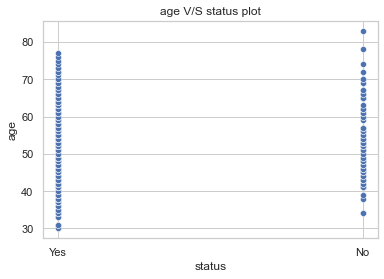

In [205]:
sns.scatterplot(x='status',y='age',data=haberman)
plt.title('age V/S status plot')
plt.show()

Text(0.5, 1.0, 'age v/s nodes plot')

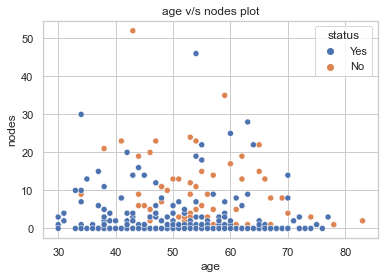

In [206]:
sns.set_theme(style='whitegrid')
sns.scatterplot(x='age',y='nodes',hue='status',data=haberman)
plt.title('age v/s nodes plot')

observations-
    1. using age and nodes features we can somewhat distinguish survival status of people 

## pair plot

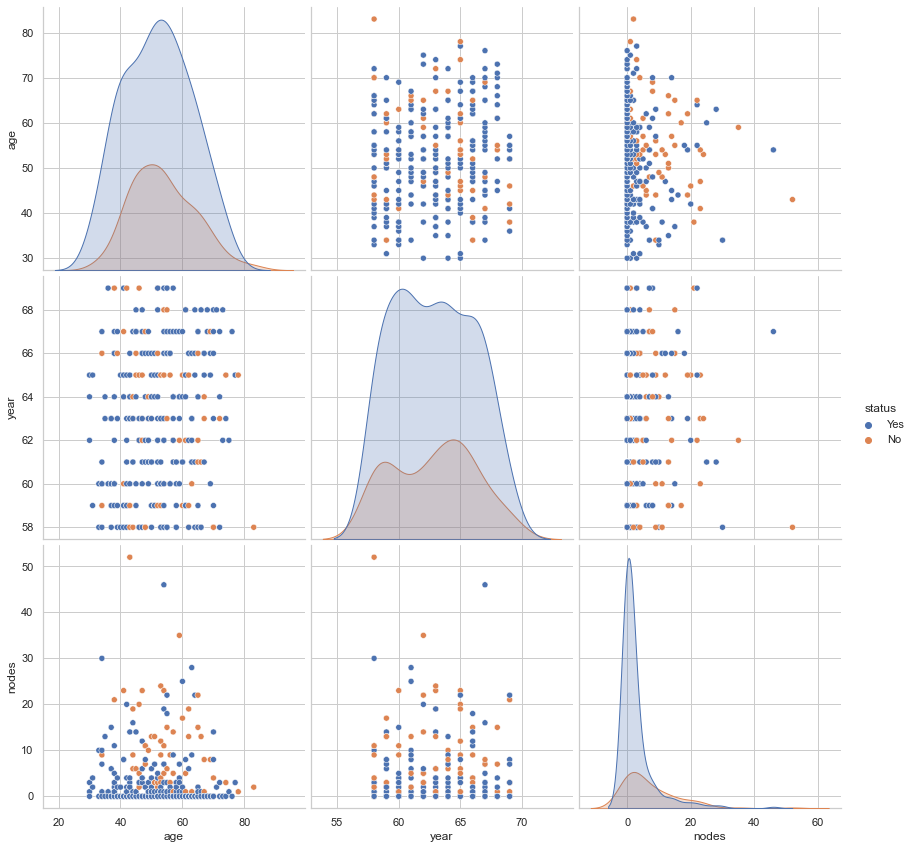

In [143]:
sns.set_style('whitegrid')
sns.pairplot(haberman,hue ='status',size =4)

### observations
                1. 'nodes' and 'age' seems to be important among all the features
                (becouse all other plots are hard to saparate & interprete )
                

## Histogram,PDF,CDF

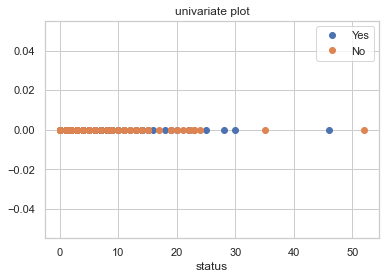

In [217]:
# univariate plot
import numpy as np
haberman_Yes = haberman.loc[haberman["status"] == "Yes"];
haberman_No = haberman.loc[haberman["status"] == "No"];

plt.plot(haberman_Yes["nodes"], np.zeros_like(haberman_Yes['nodes']), 'o',label='Yes')
plt.plot(haberman_No["nodes"], np.zeros_like(haberman_No['nodes']), 'o',label='No')
plt.xlabel('status')
plt.title('univariate plot')
plt.legend()
plt.show()

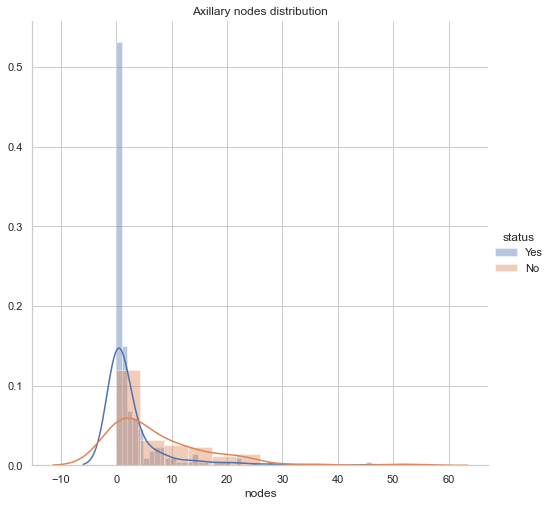

In [218]:
sns.FacetGrid(haberman,hue ='status',size =7,height =2.5).map(sns.distplot,'nodes').add_legend();
plt.title("Axillary nodes distribution")
plt.show()

Text(0.5, 1.0, 'age of patients plot')

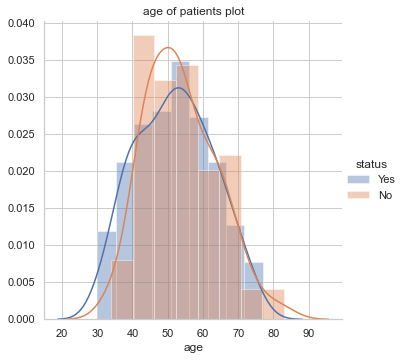

In [219]:
sns.FacetGrid(haberman,hue='status',size =5).map(sns.distplot,'age').add_legend();
plt.title('age of patients plot')

Text(0.5, 1.0, 'year of operations ploat')

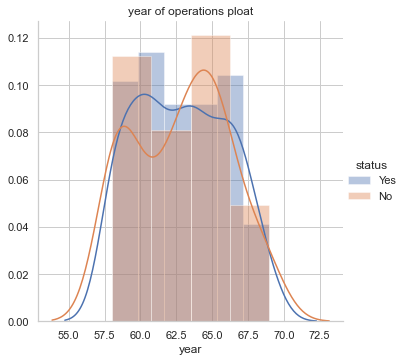

In [220]:
sns.FacetGrid(haberman,hue = 'status',size =5).map(sns.distplot,'year').add_legend()
plt.title('year of operations ploat')

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


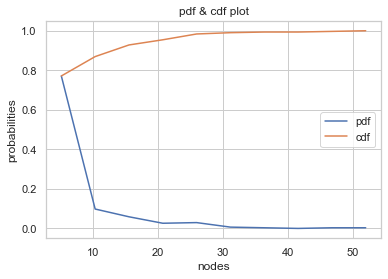

In [221]:
counts ,bin_edges =np.histogram(haberman['nodes'],density =True,)
pdf =counts/sum(counts)
print(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
# cdf calculation
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label ='cdf')
plt.xlabel('nodes')
plt.ylabel('probabilities')
plt.title('pdf & cdf plot')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nodes', ylabel='age'>

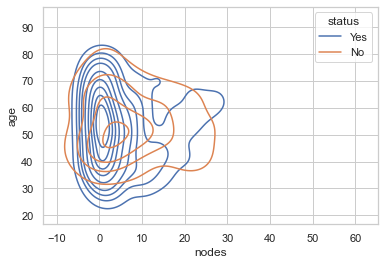

In [222]:
sns.kdeplot(data =haberman,x='nodes',y ='age',hue='status')

obervation
1.) if patient age is less than 30 and number of axillary nodes <10 patients chaces of survival is high

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


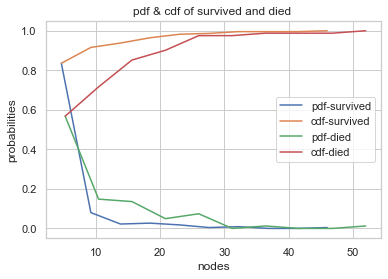

In [223]:
counts ,bin_edges =np.histogram(haberman_Yes['nodes'],density =True,)
pdf =counts/sum(counts)
print(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-survived')
# cdf calculation
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label ='cdf-survived')

counts ,bin_edges =np.histogram(haberman_No['nodes'],density =True,)
pdf1 =counts/sum(counts)
print(pdf1)
plt.plot(bin_edges[1:],pdf1,label='pdf-died')
# cdf calculation
cdf1 =np.cumsum(pdf1)
plt.plot(bin_edges[1:],cdf1,label ='cdf-died')
plt.xlabel('nodes')
plt.ylabel('probabilities')
plt.title('pdf & cdf of survived and died ')
plt.legend()
plt.show()

observation:
1.) Higher chances of survival if no_of_axillary_nodes are less than 10

In [224]:
haberman_Yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [225]:
haberman_No.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


nodes for survival is 2.79

nodes for died is     7.45

IQR for survival is   0:3

IQR for died is       1:11

## box plot 

Text(0.5, 1.0, 'nodes V/S status')

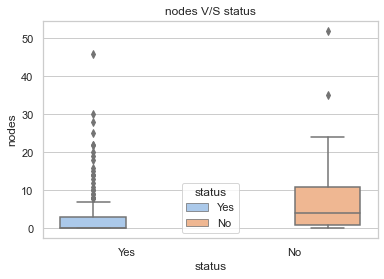

In [227]:
sns.boxplot(data =haberman,x='status',y='nodes',hue='status',palette='pastel')
plt.title('nodes V/S status')

obervation:
1) most of the patients who survived had less axillary_nodes
2) as number of nodes increase probability that patient gonna die increase

## violin plot

Text(0.5, 1.0, 'nodes V/S status')

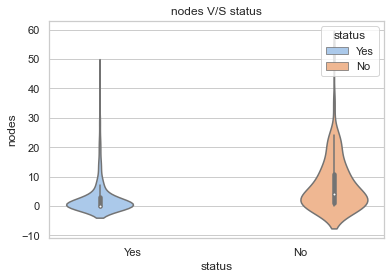

In [228]:
sns.violinplot(data = haberman,x='status',y='nodes',hue="status",palette='pastel')
plt.title('nodes V/S status')

## conclusion:-
1.) Amongs all variables nodes seems to be the important one in determinig status of patient after operation,
   order of importance : nodes>age> year
   
2.) Most of the patients who undergone operation are likely to survive 5 years or longer

3.) If patient age is less than 30 and has very less axillary_nodes his/her chances of survival is very high

4.) linear saparation is not possible of all variables is not possible

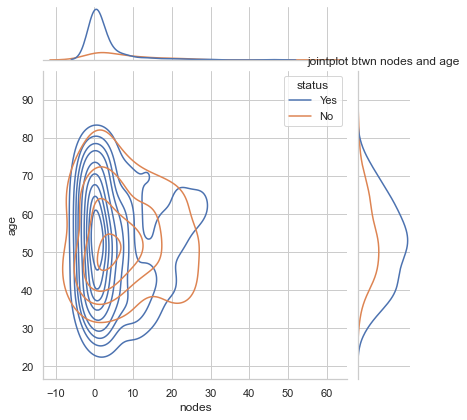

In [229]:
sns.jointplot(kind='kde',x='nodes',y='age',hue='status',data=haberman)
plt.title('jointplot btwn nodes and age')
plt.show()